<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Jhonnthan Ordenes S.</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV: 
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

####  1.1.0 Instalacion de librerias necesarias

In [2]:
!pip install numpy
!pip install opencv-python


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\fried\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\fried\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Para la instalacion de la libreria de Pytorch se usara en este caso la instalacion que ejecuta la instancia dentro de la CPU.
<p align="justify">

In [3]:
!pip3 install torch torchvision torchaudio


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\fried\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### 1.1.1 A continuacion se procede con la carga de la imagen en JPG.

Importar librerias necesarias

In [4]:
import numpy as np  # Para manejar la imagen como arreglo
from PIL import Image
import torch
import cv2        # Para leer imágenes
import matplotlib.pyplot as plt

##### Carga de imagenes con Numpy

In [5]:
# Cargar la imagen con Pillow
imagen = Image.open("Gatocurioso.jpg")

# Convertir la imagen a una matriz NumPy
matriz_imagen = np.array(imagen)

# Imprimir la matriz
print(matriz_imagen)

[[[163 160 155]
  [162 159 154]
  [161 158 153]
  ...
  [ 92  84  71]
  [ 92  84  71]
  [ 92  84  71]]

 [[162 159 154]
  [162 159 154]
  [161 158 153]
  ...
  [ 92  84  71]
  [ 91  83  70]
  [ 91  83  70]]

 [[161 158 153]
  [161 158 153]
  [161 158 153]
  ...
  [ 90  82  69]
  [ 90  82  69]
  [ 90  82  69]]

 ...

 [[206 171 169]
  [205 170 168]
  [204 169 167]
  ...
  [ 33  40  24]
  [ 32  39  23]
  [ 30  37  21]]

 [[207 172 170]
  [206 171 169]
  [205 170 168]
  ...
  [ 33  40  24]
  [ 31  38  22]
  [ 30  37  21]]

 [[207 172 170]
  [206 171 169]
  [205 170 168]
  ...
  [ 32  39  23]
  [ 30  37  21]
  [ 29  36  20]]]


In [6]:
imagen_np = np.array(matriz_imagen, dtype=np.float32)/256 #Se normaliza el vector a fin de obtener la imagen

print(imagen_np) #Imagen arreglo en numpy


[[[0.63671875 0.625      0.60546875]
  [0.6328125  0.62109375 0.6015625 ]
  [0.62890625 0.6171875  0.59765625]
  ...
  [0.359375   0.328125   0.27734375]
  [0.359375   0.328125   0.27734375]
  [0.359375   0.328125   0.27734375]]

 [[0.6328125  0.62109375 0.6015625 ]
  [0.6328125  0.62109375 0.6015625 ]
  [0.62890625 0.6171875  0.59765625]
  ...
  [0.359375   0.328125   0.27734375]
  [0.35546875 0.32421875 0.2734375 ]
  [0.35546875 0.32421875 0.2734375 ]]

 [[0.62890625 0.6171875  0.59765625]
  [0.62890625 0.6171875  0.59765625]
  [0.62890625 0.6171875  0.59765625]
  ...
  [0.3515625  0.3203125  0.26953125]
  [0.3515625  0.3203125  0.26953125]
  [0.3515625  0.3203125  0.26953125]]

 ...

 [[0.8046875  0.66796875 0.66015625]
  [0.80078125 0.6640625  0.65625   ]
  [0.796875   0.66015625 0.65234375]
  ...
  [0.12890625 0.15625    0.09375   ]
  [0.125      0.15234375 0.08984375]
  [0.1171875  0.14453125 0.08203125]]

 [[0.80859375 0.671875   0.6640625 ]
  [0.8046875  0.66796875 0.66015625]


##### Carga de imagen con Pytorch

Como la imagen ya fue procesada a un arreglo matricial para ser presentada con la libreria Numpy, ahora solo se transformara la matriz a tensor.

In [7]:
# Convertir imagen NumPy (H, W, C) a tensor PyTorch (C, H, W)

img_torch = torch.from_numpy(imagen_np).float() # (H, W, C)

print(img_torch)

#Para verificar el cambio de matriz a tensor verificamos la clase de ambos arreglos entre Pytorch y Numpy
print(type(img_torch)) 

print(type(imagen_np))

tensor([[[0.6367, 0.6250, 0.6055],
         [0.6328, 0.6211, 0.6016],
         [0.6289, 0.6172, 0.5977],
         ...,
         [0.3594, 0.3281, 0.2773],
         [0.3594, 0.3281, 0.2773],
         [0.3594, 0.3281, 0.2773]],

        [[0.6328, 0.6211, 0.6016],
         [0.6328, 0.6211, 0.6016],
         [0.6289, 0.6172, 0.5977],
         ...,
         [0.3594, 0.3281, 0.2773],
         [0.3555, 0.3242, 0.2734],
         [0.3555, 0.3242, 0.2734]],

        [[0.6289, 0.6172, 0.5977],
         [0.6289, 0.6172, 0.5977],
         [0.6289, 0.6172, 0.5977],
         ...,
         [0.3516, 0.3203, 0.2695],
         [0.3516, 0.3203, 0.2695],
         [0.3516, 0.3203, 0.2695]],

        ...,

        [[0.8047, 0.6680, 0.6602],
         [0.8008, 0.6641, 0.6562],
         [0.7969, 0.6602, 0.6523],
         ...,
         [0.1289, 0.1562, 0.0938],
         [0.1250, 0.1523, 0.0898],
         [0.1172, 0.1445, 0.0820]],

        [[0.8086, 0.6719, 0.6641],
         [0.8047, 0.6680, 0.6602],
         [0.

#####  Carga de imagen con Opencv

In [8]:
ruta_imagen = 'Gatocurioso.jpg'
imagen_bgr = cv2.imread(ruta_imagen)

print(imagen_bgr)

[[[155 160 163]
  [154 159 162]
  [153 158 161]
  ...
  [ 71  84  92]
  [ 71  84  92]
  [ 71  84  92]]

 [[154 159 162]
  [154 159 162]
  [153 158 161]
  ...
  [ 71  84  92]
  [ 70  83  91]
  [ 70  83  91]]

 [[153 158 161]
  [153 158 161]
  [153 158 161]
  ...
  [ 69  82  90]
  [ 69  82  90]
  [ 69  82  90]]

 ...

 [[169 171 206]
  [168 170 205]
  [167 169 204]
  ...
  [ 24  40  33]
  [ 23  39  32]
  [ 21  37  30]]

 [[170 172 207]
  [169 171 206]
  [168 170 205]
  ...
  [ 24  40  33]
  [ 22  38  31]
  [ 21  37  30]]

 [[170 172 207]
  [169 171 206]
  [168 170 205]
  ...
  [ 23  39  32]
  [ 21  37  30]
  [ 20  36  29]]]


Se verifica el resultado de la imagen obtenida.

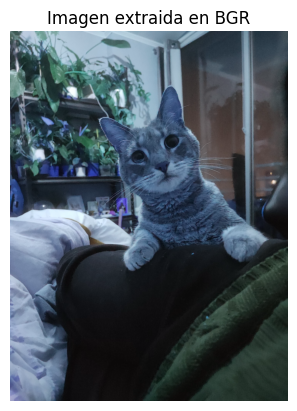

In [9]:
plt.imshow(imagen_bgr)  # Se verá mal (azul donde debería ser rojo)
plt.title("Imagen extraida en BGR")
plt.axis("off")
plt.show()

Como el paquete OpenCV trabaja con la escala BGR se obtiene una imagen con los colores rojos y azules invertidos. Para obtener la imagen en la escala de colores original (RGB) se implementa el siguiente linea de codigo.

In [10]:
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB) #ARREGLO DE OPENCV

print(imagen_rgb) # Se ve como se mueve el canal de BGR a RGB en la matriz

[[[163 160 155]
  [162 159 154]
  [161 158 153]
  ...
  [ 92  84  71]
  [ 92  84  71]
  [ 92  84  71]]

 [[162 159 154]
  [162 159 154]
  [161 158 153]
  ...
  [ 92  84  71]
  [ 91  83  70]
  [ 91  83  70]]

 [[161 158 153]
  [161 158 153]
  [161 158 153]
  ...
  [ 90  82  69]
  [ 90  82  69]
  [ 90  82  69]]

 ...

 [[206 171 169]
  [205 170 168]
  [204 169 167]
  ...
  [ 33  40  24]
  [ 32  39  23]
  [ 30  37  21]]

 [[207 172 170]
  [206 171 169]
  [205 170 168]
  ...
  [ 33  40  24]
  [ 31  38  22]
  [ 30  37  21]]

 [[207 172 170]
  [206 171 169]
  [205 170 168]
  ...
  [ 32  39  23]
  [ 30  37  21]
  [ 29  36  20]]]


Finalmente cargadas las imagenes con los 3 paquetes propuestos, se puede proceder a presentar las imagenes obtenidas de estas.

#### 1.1.2 Imagenes resultantes

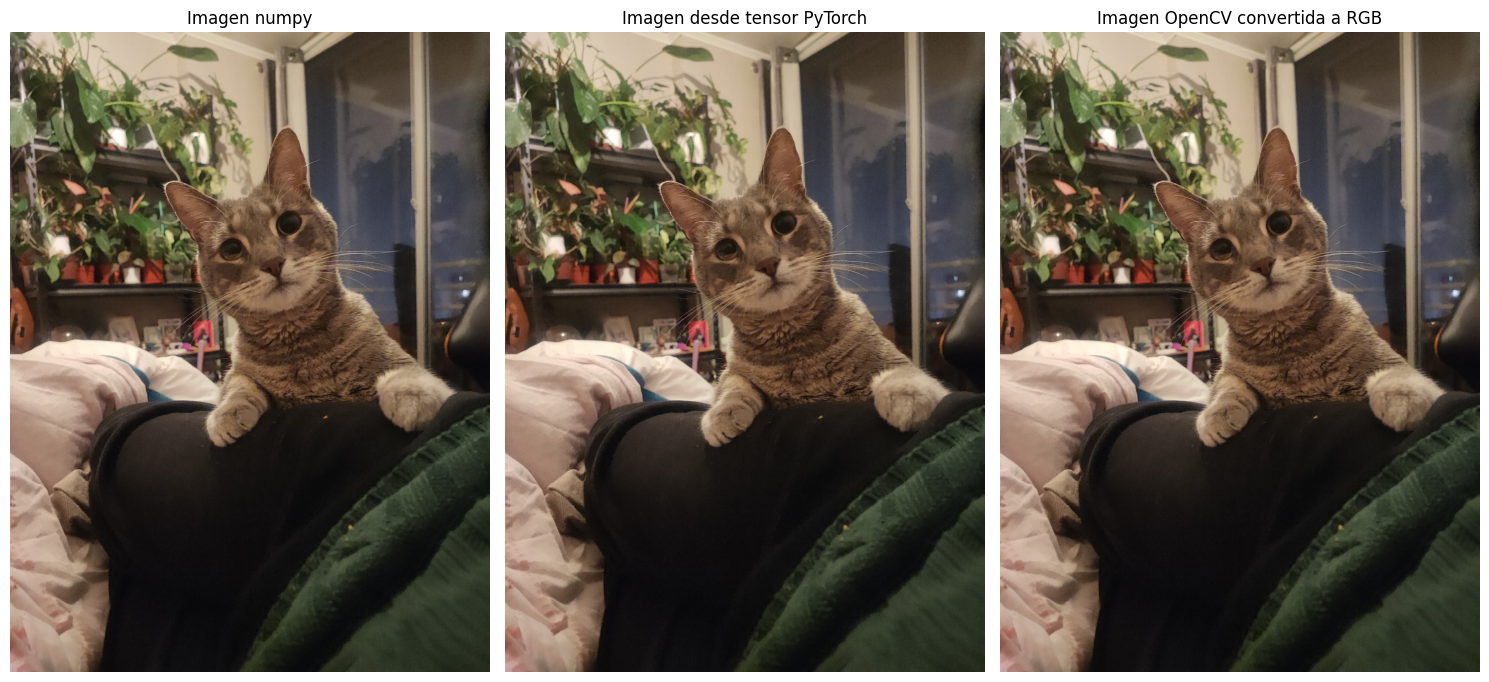

In [11]:
plt.figure(figsize=(15, 7))
plt.subplot (1,3,1)
#IMAGEN NUMPY
plt.imshow(imagen_np)
plt.title("Imagen numpy")
plt.axis("off")

plt.subplot (1,3,2)
#IMAGEN PYTORCH
plt.imshow(img_torch)
plt.title("Imagen desde tensor PyTorch")
plt.axis("off")

plt.subplot (1,3,3)
#IMAGEN OPENCV
plt.imshow(imagen_rgb) 
plt.title("Imagen OpenCV convertida a RGB")
plt.axis("off")
plt.tight_layout()
plt.show()


#### 1.1.3 Transformar la imagen a escala de grises usando cada uno de los paquetes.

##### Con Numpy

A modo de obtener una imagen en blanco y negro ocupando la menor cantidad de recursos de computo posible se hara uso de una ecuacion lineal que tiene el fin de aproximar el proceso de decompresion y compresion gamma para poder replicar la imagen en blanco y negro de una forma mas fidelizada a la intensidad de colores que percibe el ojo humano, el cual percibe con mayor intensidad el color verde y menor intensidad el azul.

##### Formula para escala de grises:

$Grayscale =0.299\cdot R+0.587\cdot G+0.114\cdot B$

In [12]:
# Convertir a escala de grises utilizamos el arreglo de numpy anterior
# y aplicamos los cambios
imagen_gris_np = (0.2989 * matriz_imagen[:, :, 0] +  # Canal R selecciona todas las filas, todas las columnas y solo el primer canal (red) de una imagen RGB.
                  0.5870 * matriz_imagen[:, :, 1] +  # Canal G selecciona todas las filas, todas las columnas y solo el primer canal (green) de una imagen RGB.
                  0.1140 * matriz_imagen[:, :, 2])   # Canal B selecciona todas las filas, todas las columnas y solo el primer canal (blue) de una imagen RGB.

##### Con Pytorch

In [13]:
from torchvision import transforms
import torch


# Convertir a (C, H, W) — esto es lo que espera PyTorch
img_torch = img_torch.permute(2, 0, 1)  # (3, H, W)
print(img_torch)
#En PyTorch, el método permute se utiliza para reordenar los ejes (dimensiones) de un tensor.


# Usar transforms.Grayscale para obtener un canal (1, H, W)
to_gray = transforms.Grayscale()
img_gray = to_gray(img_torch)  # Resultado: (1, H, W)
print(img_gray)
# Mostrar con matplotlib



tensor([[[0.6367, 0.6328, 0.6289,  ..., 0.3594, 0.3594, 0.3594],
         [0.6328, 0.6328, 0.6289,  ..., 0.3594, 0.3555, 0.3555],
         [0.6289, 0.6289, 0.6289,  ..., 0.3516, 0.3516, 0.3516],
         ...,
         [0.8047, 0.8008, 0.7969,  ..., 0.1289, 0.1250, 0.1172],
         [0.8086, 0.8047, 0.8008,  ..., 0.1289, 0.1211, 0.1172],
         [0.8086, 0.8047, 0.8008,  ..., 0.1250, 0.1172, 0.1133]],

        [[0.6250, 0.6211, 0.6172,  ..., 0.3281, 0.3281, 0.3281],
         [0.6211, 0.6211, 0.6172,  ..., 0.3281, 0.3242, 0.3242],
         [0.6172, 0.6172, 0.6172,  ..., 0.3203, 0.3203, 0.3203],
         ...,
         [0.6680, 0.6641, 0.6602,  ..., 0.1562, 0.1523, 0.1445],
         [0.6719, 0.6680, 0.6641,  ..., 0.1562, 0.1484, 0.1445],
         [0.6719, 0.6680, 0.6641,  ..., 0.1523, 0.1445, 0.1406]],

        [[0.6055, 0.6016, 0.5977,  ..., 0.2773, 0.2773, 0.2773],
         [0.6016, 0.6016, 0.5977,  ..., 0.2773, 0.2734, 0.2734],
         [0.5977, 0.5977, 0.5977,  ..., 0.2695, 0.2695, 0.

##### Con OpenCV

In [14]:
imagen_gris_cv2 = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)

#### 1.1.4 Guardar las imagenes resultantes en blanco y negro

In [15]:
plt.imsave('imagen_gris_matplotlib_np.jpg', imagen_gris_np, cmap='gray')
plt.imsave('imagen_gris_matplotlib_torch.jpg', img_gray.squeeze().numpy(), cmap='gray')
plt.imsave('imagen_gris_matplotlib_cv2.jpg', imagen_gris_cv2, cmap='gray')

#### 1.1.5 Imagenes resultantes

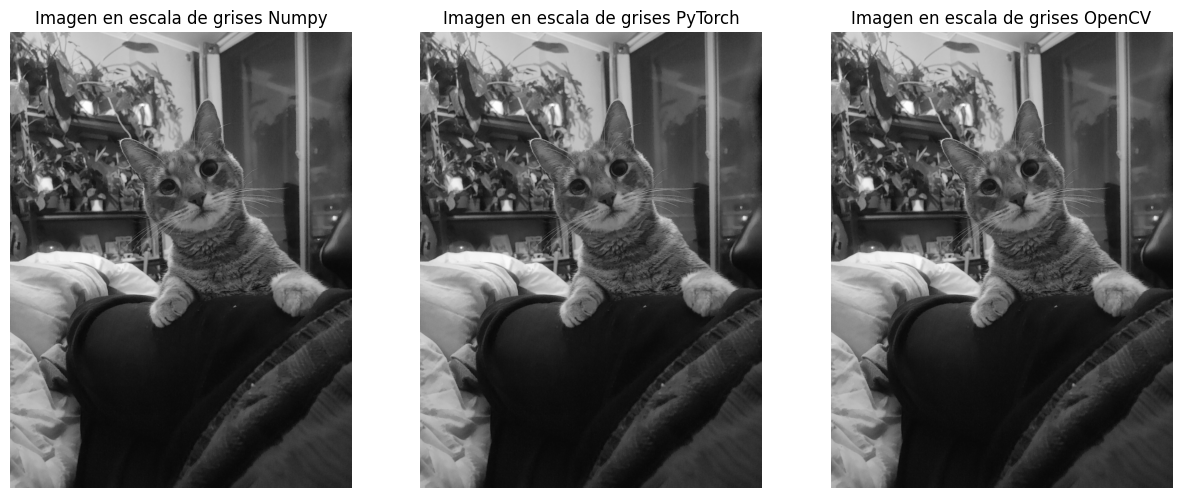

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(15, 7))
plt.subplot (1,3,1)
plt.imshow(imagen_gris_np, cmap='gray')  
plt.title("Imagen en escala de grises Numpy")
plt.axis("off")
plt.subplot (1,3,2)
plt.imshow(img_gray.squeeze().numpy(), cmap='gray')
plt.title("Imagen en escala de grises PyTorch")
plt.axis("off")
plt.subplot (1,3,3)
plt.imshow(imagen_gris_cv2, cmap='gray')  
plt.title("Imagen en escala de grises OpenCV")
plt.axis("off")
plt.show()
plt.tight_layout()
plt.show()

## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

para realizar lo requerido primero se carga la imagen.

In [17]:
rutapng = "image.png" #Ruta donde se encuentra imagen jpg
imagenPng = cv2.imread(rutapng) #Cargar imagen jpg original
imagenPng = cv2.cvtColor(imagenPng, cv2.COLOR_BGR2RGB) #ARREGLO DE OPENCV para RGB

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

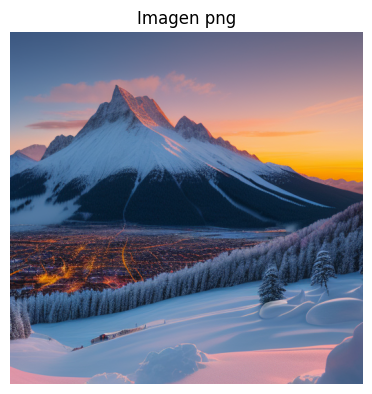

In [18]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(imagenPng)
plt.title("Imagen png")
plt.axis("off")


In [19]:
import numpy as np
import matplotlib.pyplot as plt

def apply_threshold_color(image, threshold, pendiente):
    # Crear una imagen de salida del mismo tamaño
    transformed_image = np.zeros_like(image)

    for c in range(3):  # Recorre los 3 canales de color: R=0, G=1, B=2
        for i in range(image.shape[0]):  # Recorre las filas (alto de la imagen)
            for j in range(image.shape[1]):  # Recorre las columnas (ancho de la imagen)
                
                pixel = image[i, j, c]  # Obtiene el valor del píxel en la posición (i, j) del canal c (R, G o B)
                
                if pixel < threshold:  # Si el valor del píxel es menor al umbral
                    transformed_image[i, j, c] = 0  # Se asigna el valor 0 (oscuro)
                else:
                    # Se aplica la transformación tipo rampa con la pendiente definida
                    nuevo_valor = min(255, pendiente * (pixel - threshold))  # Se asegura de no superar 255
                    transformed_image[i, j, c] = nuevo_valor  # Se guarda el nuevo valor en la imagen transformada


    return transformed_image.astype(np.uint8)

| **Threshold** | **Slope** | **Efecto Visual**                                                               |
| ------------- | --------- | ------------------------------------------------------------------------------- |
| 50            | 1.5       | Aumenta ligeramente el brillo en casi toda la imagen. Cambio suave y homogéneo. |
| 50            | 3.0       | Zonas oscuras se aclaran rápido. Imagen muy contrastada, puede saturar blancos. |
| 100           | 1.5       | Se mejora el brillo medio. Mantiene más detalles en zonas oscuras.              |
| 100           | 2.5       | Contraste fuerte en zonas claras, zonas oscuras quedan casi sin cambio.         |
| 150           | 2.0       | Realce solo en zonas más brillantes. Mejora luces sin tocar sombras.            |
| 180           | 3.5       | Solo zonas muy claras cambian. Destaca reflejos, pero puede perder detalles.    |
| 200           | 2.0       | Realza zonas muy brillantes, imagen general se ve más apagada.                  |
| 255           | 2.0       | No hay cambio visible (nadie supera el umbral). Imagen se ve igual o negra.     |


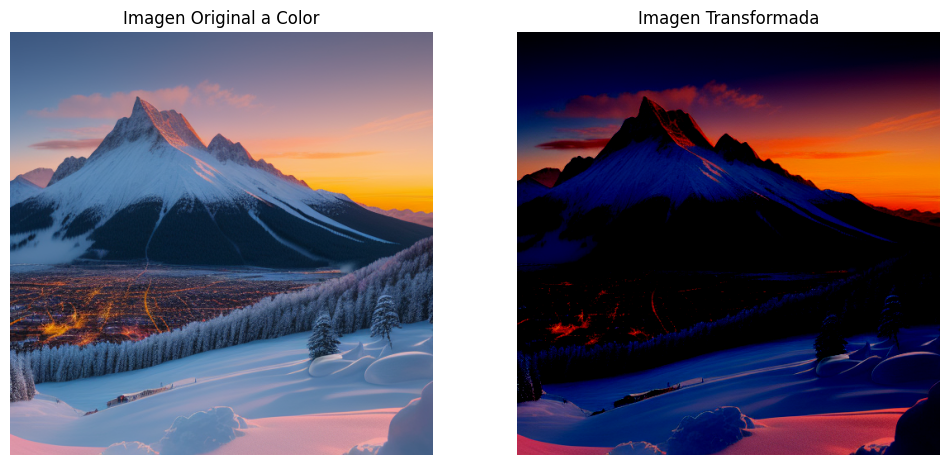

In [20]:
threshold = 128
pendiente = 2
imagen_transformada = apply_threshold_color(imagenPng, threshold, pendiente)

# Mostrar resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagen Original a Color")
plt.imshow(imagenPng)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Imagen Transformada")
plt.imshow(imagen_transformada)
plt.axis("off")
plt.show()

#### 2.2 Aplica una transformación en la vecindad. 
- Debes hacer una vecindad con dimensiones de 5x5 pixeles. 
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



In [21]:
def vecindad(imagen, Tvecindad):
  """
  Calcula la transformación en la vecindad de una imagen.

  Parámetros:

  imagen: Imagen a transformar.
  Tvecindad: Tamaño de la vecindad.
  """
  imgVec = np.zeros_like(imagen) #Nos aseguramos que el valor minimo sea 0 y el máximo 255

  #Iteración sobre la imagen con desplazamiento de tamaño de vecindad
  for i in range(imagen.shape[0] - Tvecindad + 1):
    for j in range(imagen.shape[1] - Tvecindad + 1):

      vecindad = imagen[i:i+Tvecindad, j:j+Tvecindad] #vecindad de imagen en posición actual
      maxVec = np.max(vecindad, axis=(0,1)) #Valor máximo de la vecindad
      imgVec[i:i+Tvecindad, j:j+Tvecindad] = maxVec #Se asigna el valor máximo a toda la vecindad

  return imgVec

Tvecindad = 5 #Tamaño de la vecindad de 5x5
imagenVecindad = vecindad(imagenPng, Tvecindad) #Se crea imagen con transformación en la vecindad

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

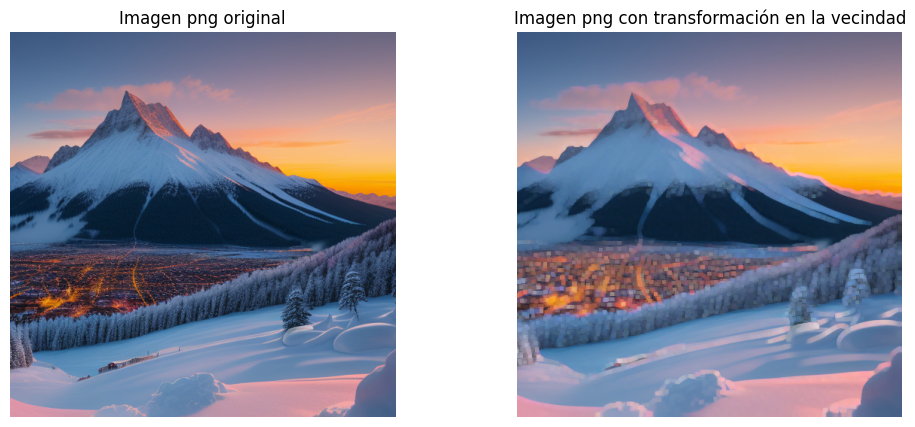

In [22]:
#Mostrar imagen png original y con transformación en la vecindad
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(imagenPng)
plt.title("Imagen png original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(imagenVecindad)
plt.title("Imagen png con transformación en la vecindad")
plt.axis("off")

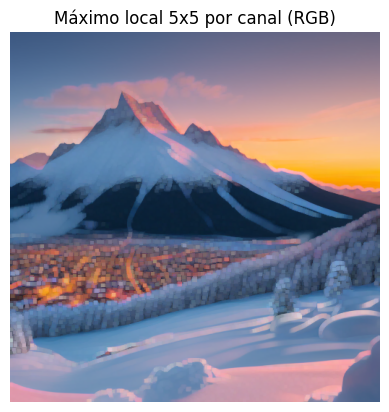

In [23]:
from scipy.ndimage import maximum_filter

# imagen_np: imagen RGB con forma (H, W, 3)
imagen_filtrada = np.zeros_like(imagenPng)

# Aplicar el filtro de máximo local (5x5) a cada canal por separado
for c in range(3):
    imagen_filtrada[:, :, c] = maximum_filter(imagenPng[:, :, c], size=5)

# Mostrar imagen resultante
plt.imshow(imagen_filtrada)
plt.title("Máximo local 5x5 por canal (RGB)")
plt.axis("off")
plt.show()

#### 2.3 Aplica transformación de intensidad
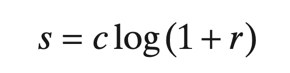
- Debes hacer una vecindad con dimensiones de 10x10 pixeles. 
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

In [24]:
def vecindad(imagen, Tvecindad):
  """
  Calcula la transformación en la vecindad de una imagen.

  Parámetros:

  imagen: Imagen a transformar.
  Tvecindad: Tamaño de la vecindad.
  """
  imgVec = np.zeros_like(imagen) #Nos aseguramos que el valor minimo sea 0 y el máximo 255

  #Iteración sobre la imagen con desplazamiento de tamaño de vecindad
  for i in range(imagen.shape[0] - Tvecindad + 1):
    for j in range(imagen.shape[1] - Tvecindad + 1):

      vecindad = imagen[i:i+Tvecindad, j:j+Tvecindad] #vecindad de imagen en posición actual
      transformed_block = c * np.log1p(vecindad.astype(np.float32))
      transformed_block = np.clip(transformed_block, 0, 255)
      imgVec[i:i+Tvecindad, j:j+Tvecindad] = transformed_block #Se asigna el valor máximo a toda la vecindad

  return imgVec

c = 46
Tvecindad = 10 #Tamaño de la vecindad de 10x10
imagenVecindad = vecindad(imagenPng, Tvecindad) #Se crea imagen con transformación en la vecindad

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

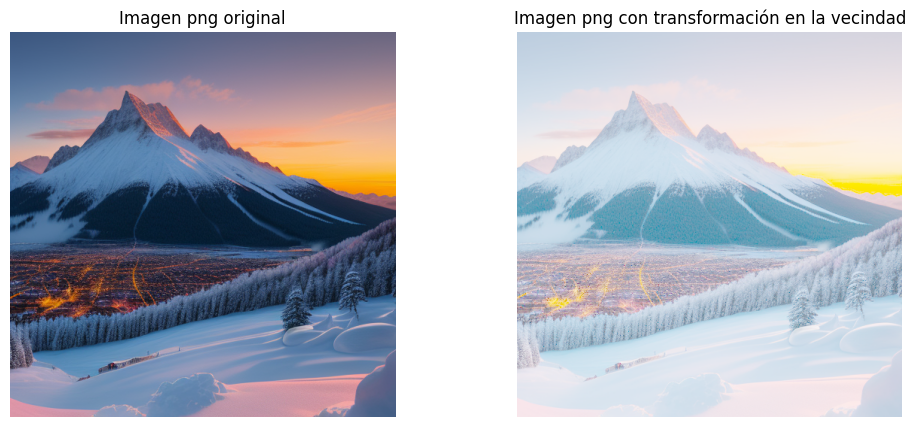

In [25]:
#Mostrar imagen png original y con transformación en la vecindad
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(imagenPng)
plt.title("Imagen png original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(imagenVecindad)
plt.title("Imagen png con transformación en la vecindad")
plt.axis("off")

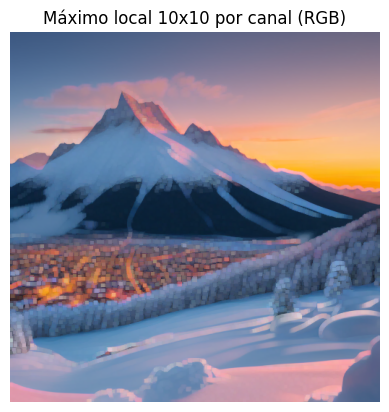

In [26]:
from scipy.ndimage import maximum_filter

# imagen_np: imagen RGB con forma (H, W, 3)
imagen_filtrada = np.zeros_like(imagenPng)

# Aplicar el filtro de máximo local (5x5) a cada canal por separado
for c in range(3):
    imagen_filtrada[:, :, c] = maximum_filter(imagenPng[:, :, c], size=5)

# Mostrar imagen resultante
plt.imshow(imagen_filtrada)
plt.title("Máximo local 10x10 por canal (RGB)")
plt.axis("off")
plt.show()

#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada. 
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

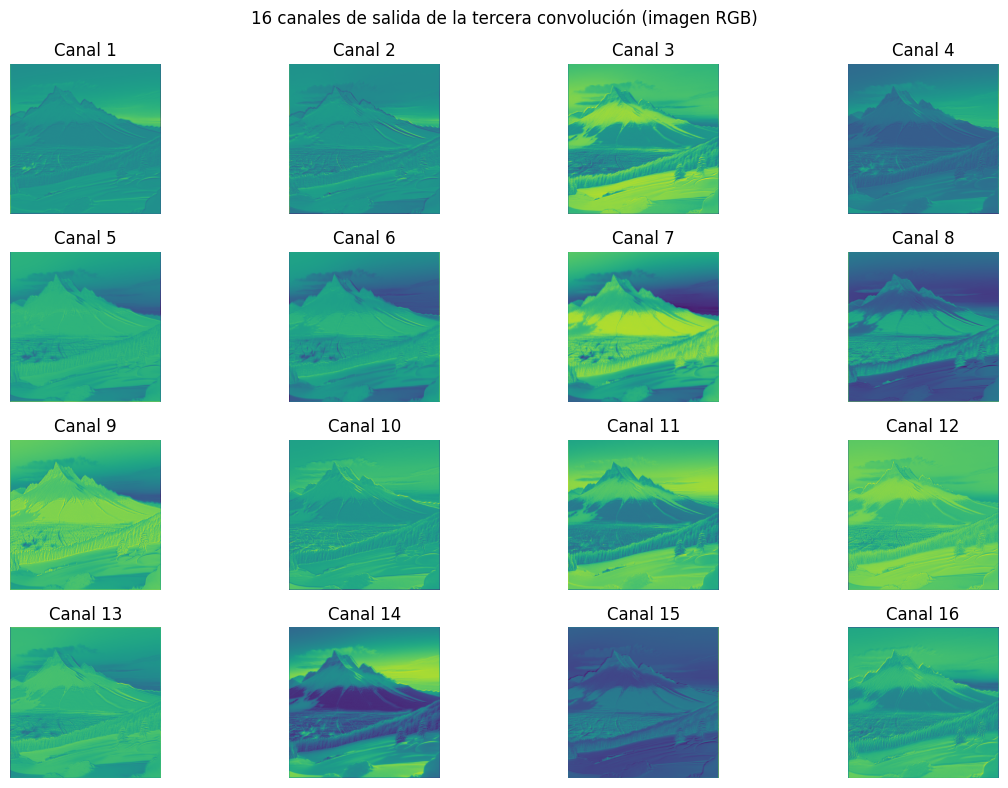

In [27]:
import torch.nn as nn


# Normalizar y convertir a tensor
img_tensor = torch.tensor(imagenPng, dtype=torch.float32) / 255.0  # shape: (H, W, 3)
img_tensor = img_tensor.permute(2, 0, 1).unsqueeze(0)  # shape: (1, 3, H, W)

# Definir capas convolucionales
conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(in_channels=8, out_channels=12, kernel_size=3, stride=1, padding=1)
conv3 = nn.Conv2d(in_channels=12, out_channels=16, kernel_size=3, stride=1, padding=1)

# Aplicar convoluciones en cascada
x1 = conv1(img_tensor)
x2 = conv2(x1)
x3 = conv3(x2)

# Resultado final: shape (1, 16, H, W)
output = x3.squeeze(0).detach()

# Visualizar los 16 canales de salida
plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(output[i].numpy())
    plt.title(f'Canal {i+1}')
    plt.axis('off')

plt.suptitle("16 canales de salida de la tercera convolución (imagen RGB)")
plt.tight_layout()
plt.show()


## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


Se carga la imagen binaria

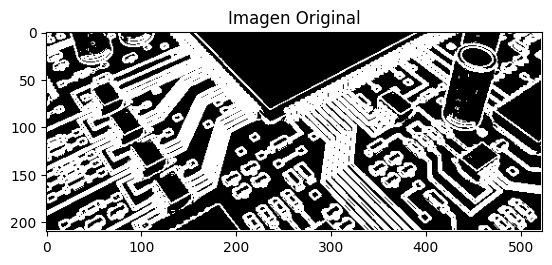

In [28]:

imagen = Image.open("a4.png").convert("L")
imagen_np = np.array(imagen)

#Por temas de procesamiento la imagen original a pesar de ser una 
# imagen binaria es mostrada en amarillo y purpura por lo que se le agrega el colormap gris a la imagen
# presentada con matplotlib.
plt.imshow(imagen_np, cmap= "gray") 
plt.title("Imagen Original")
plt.show()


Se invierte la imagen simplemente restandole la amplitud del pixel a los 255 que corresponden al numero maximo en la escala RGB de 8 bits.

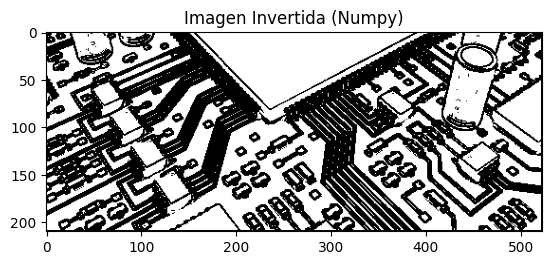

In [29]:
imagen_invertida = 255 - imagen_np

plt.imshow(imagen_invertida, cmap='gray')
plt.title("Imagen Invertida (Numpy)")
plt.show()


### 3.2 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



Invirtiendo la imagen haciendo uso de Pytorch

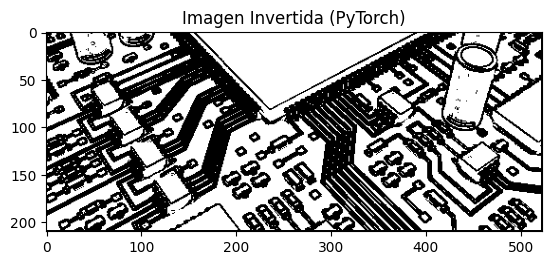

In [30]:
imagen_tensor = torch.from_numpy(imagen_np).float()
imagen_invertida_torch = 255 - imagen_tensor

plt.imshow(imagen_invertida_torch.numpy(), cmap='gray')
plt.title("Imagen Invertida (PyTorch)")
plt.show()


Invirtiendo la imagen haciendo uso de OpenCV.

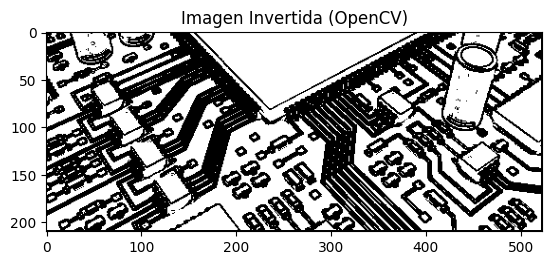

In [31]:
import cv2

imagen_cv = cv2.imread("a4.png", cv2.IMREAD_GRAYSCALE)
imagen_invertida_cv = cv2.bitwise_not(imagen_cv)

plt.imshow(imagen_invertida_cv, cmap='gray')
plt.title("Imagen Invertida (OpenCV)")
plt.show()


## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor. 
    

In [38]:
# Función para generar parches de 16x16
def generar_patches(imagen_np, patch_size=16):
    alto, ancho, canales = imagen_np.shape
    patches = []
    for y in range(0, alto - patch_size + 1, patch_size):
        for x in range(0, ancho - patch_size + 1, patch_size):
            parche = imagen_np[y:y+patch_size, x:x+patch_size, :]
            patches.append(parche)
    return patches

In [39]:
# Parámetros
patch_size = 16
tamano_maximo = 512

# Cargar imagen y limitar su tamaño a 512x512
imagen = Image.open("LEGO_logo.svg.png").convert("RGB")
ancho, alto = imagen.size

# Escalar si alguna dimensión es mayor a 512
nuevo_ancho = min(ancho, tamano_maximo)
nuevo_alto = min(alto, tamano_maximo)
imagen = imagen.resize((nuevo_ancho, nuevo_alto))
imagen_np = np.array(imagen)

# Generar parches
patches = generar_patches(imagen_np, patch_size)

# Calcular dimensiones de la grilla
alto_img, ancho_img, _ = imagen_np.shape
filas = alto_img // patch_size
columnas = ancho_img // patch_size

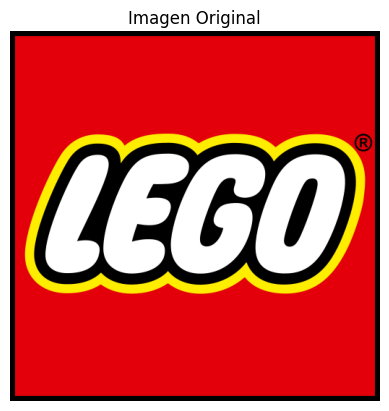

In [40]:
# Mostrar imagen original
plt.imshow(imagen)
plt.title("Imagen Original")
plt.axis('off')
plt.show()

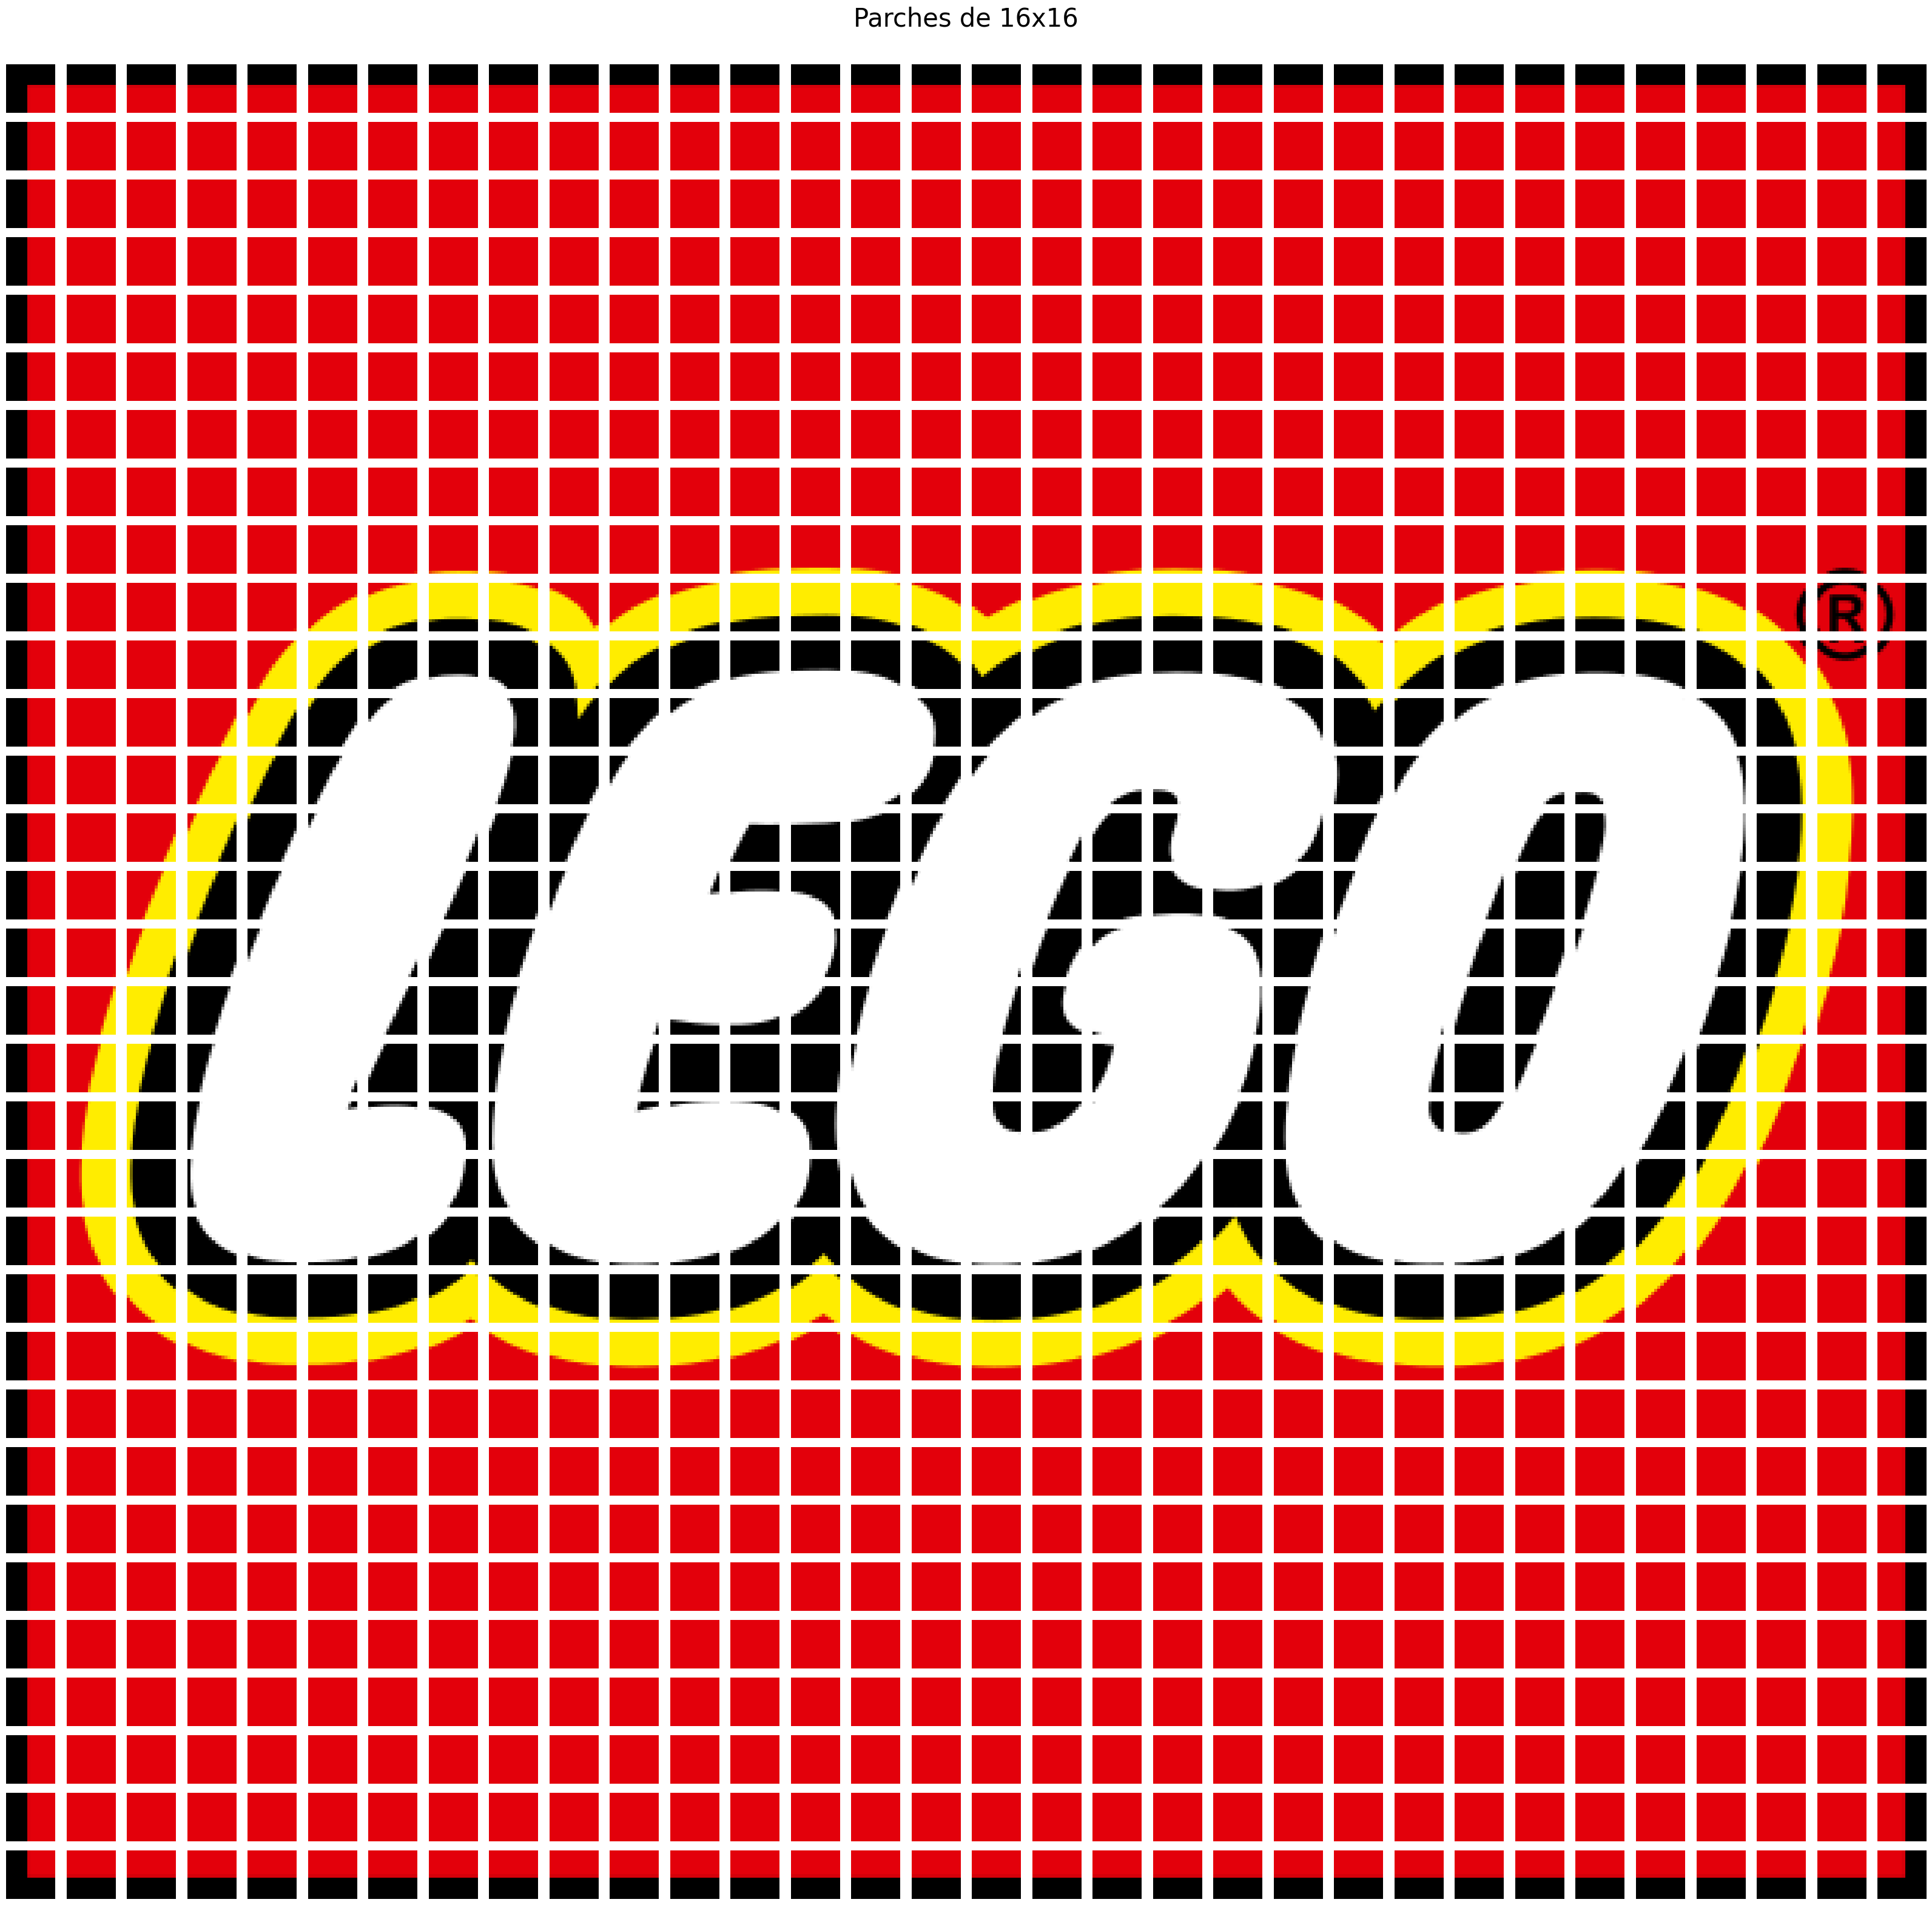

In [41]:
# Mostrar todos los parches en una grilla dinámica
fig, axs = plt.subplots(filas, columnas, figsize=(columnas, filas))

for i in range(filas):
    for j in range(columnas):
        idx = i * columnas + j
        axs[i, j].imshow(patches[idx])
        axs[i, j].axis('off')

plt.suptitle("Parches de 16x16", fontsize=30)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


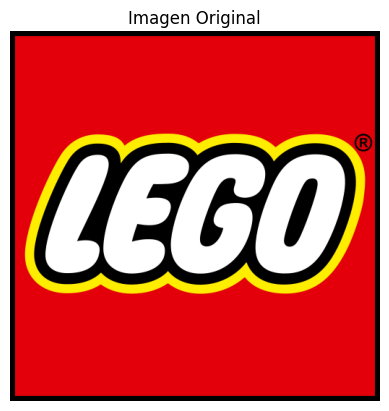

## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
